In [4]:
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt
import numpy as np

In [5]:
wr_df = pd.read_parquet('worldrecords.parquet')

In [6]:
# split the dataframe
wr_150_df = wr_df[wr_df.cc == 150]
wr_200_df = wr_df[wr_df.cc == 200]

# extract the two variables
X = wr_150_df.time.values.reshape((-1,1))
y = wr_200_df.time.values.reshape((-1,1))

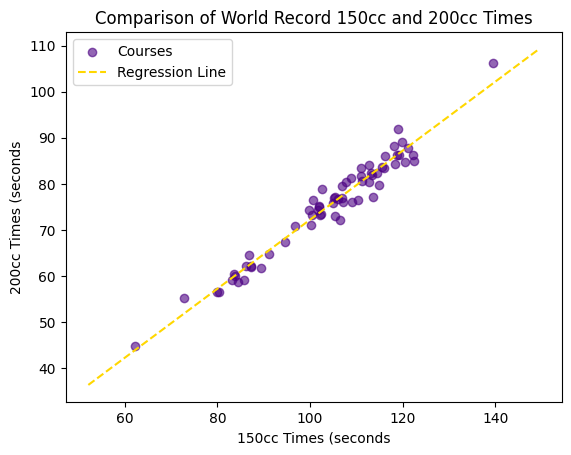

Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, color='green', marker='o', linestyle='dashed',
...      linewidth=2, markersize=12)


In [15]:
# fit with linear regression
reg = linear_model.LinearRegression()
reg.fit(X,y)

# extract the line of best fit y=mx+b
m = reg.coef_[0][0]
b = reg.intercept_[0]

domain = np.linspace(np.min(X)-10,np.max(X)+10)

plt.scatter(X,y, label='Courses', color = 'indigo', alpha=.6)
plt.plot(domain, m*domain+b, '--', label='Regression Line', color='gold')
plt.xlabel('150cc Times (seconds')
plt.ylabel('200cc Times (seconds')
plt.title('Comparison of World Record 150cc and 200cc Times')
plt.legend()
plt.show()


